# Домашка 
---------------------------------------

tldr:
    
* Выбрать архитектуру из рассказанных NST, pix2pix, CycleGAN$^1$
* Подберите к ней задачу, чтобы она вам нравилась
* Подберите еще одну задачу, которая уже решена (если не NST)
* Повторите решение, которое уже есть$^2$ (если не NST)
* Решите свою задачу

---------------------------------------
1. Расположены в порядке возрастания сложности и крутизны
2. Поверьте если вы сделаете этот пункт следующий будет в *разы* легче

## Если вы выбрали Neural Style Transfer
---------------------------------------
Тут все довольно просто на первый и на второй взгляд. Поэтому недосотаточно просто написать свою функцию потерь и сдать ноутбук. Если вы хотите приличных баллов, то у вас есть две опции:


1. Вы разделяете картинку на две части и переносите на них разные стили. <p><span style="color:red">Нельзя просто взять и два раза применить обычную архитектуру сначала к одной чати картинки, а потом к другой.</span></p> От вас ожидается, что вы отдадите нейросети два картинки стиля и она внутри себя(скорее внутри лосс функции) разделит выходную картинку на две части и к одной части применит один стиль, а к другой - второй. 

2. Вы переносите *одновременно* два стиля на одну картинку контента.
<p><span style="color:red">Нельзя просто взять и два раза применить обычную архитектуру сначала с одним стилем, а потом с другим.</span></p>
От вас ожидается, что вы модифицируете модель(скорее лосс модели) для того, чтобы два стиля учитывались с разными весами. 

## Если вы выбрали pix2pix
---------------------------------------------
Здесь от вас ожидается, что вы реализуете свою архитектуру для pix2pix модели. Пожалуйста не копируйте код из открытых репозиториев. Этот факт очень легко обнаружить. Перед тем, как приступить проверьте, что обе задачи, которые вы выбрали влезают на вашу видеокарту или на карту Google Colab. Если они не влезают, но вам все равно очень хочется, то вы можете израсходовать все безплатные триалы облаков(Google, Amazon, .. etc) во вселенной. 

## Если вы выбрали CycleGAN
--------------------------------------------
Здесь от вас ожидается, что вы реализуете свою архитектуру для CycleGAN модели. Пожалуйста не копируйте код из открытых репозиториев. Этот факт очень легко обнаружить. Перед тем, как приступить проверьте, что обе задачи, которые вы выбрали влезают на вашу видеокарту или на карту Google Colab. CycleGAN в этом смысле хуже, чем pix2pix, он ест больше памяти. Если они не влезают, но вам все равно очень хочется, то вы можете израсходовать все беcплатные триалы облаков(Google, Amazon, .. etc) во вселенной. 

## Remarks:
-----------------------------------------

* Это задание нужно для того, чтобы вы наступили на все грабли, что есть. Узнали об их существовании и научились обходить. Посмотрели на неработающие модели и поняли, что все тлен. Изгуглили весь интернет и в конце заставили это все работать. Поверьте, оно того стиот. Не откладывайте это задание на ночь перед сдачей, так как весь смысл \*пуф\* улетучится.

* У вас два союзника в этой борьбе:
    1. Оригинальная статья, те психи, что ее писала как то заставили свою модель работать. Их мысли, которыми они спроводили свое детище, позволят вам написать свой вариант алгоритма. 
    2. Гугл, он знает ответы на почти все ваши вопросы, но у него есть две ипостаси одна простая в обещении и вы все ее занаете(русскоязычная), а есть еще одна, которая кусается, но знает больше(англоязычная). Если не знаете языва - учите на ходу :)
    
* На самом деле у вас есть еще один союзник, это ментор проекта(или лектор или семинарист). Его ресурсом нужно пользоваться в ситуации, в которой вы не можете(занчит попытались и не вышло) найти ответов, используя Гугл и статью.

* Сдавать это все нужно следующим образом. Код вы кидаете на github и отправляете ссылку туда, куда вам сказали(в телеграм, степик или еще куда-то)

Neural Style Transfer:

Я выбрал первый пункт, в котором нужно разделить нартинку на 2 части и перенести на них разные стили.

Реализацию взял из данной статьи: https://arxiv.org/abs/1508.06576

Будем использовать pytorch:

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.optim as optim
from torchvision import transforms, models

Большие изображения замедлят обработку, будем использовать изображения 600 на 400 пикселей.

In [ ]:
def load(img_path, max_size=400, shape=None):
  image = Image.open(img_path).convert('RGB')  
  max_size = 400
  if max(image.size) > max_size:
    size = max_size
  else:
    size = max(image.size)
	
  if shape is not None:
    size = shape
  
  in_transform = transforms.Compose([
    transforms.Resize((size, int(1.5*size))),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
  
  image = in_transform(image)[:3, :, :].unsqueeze(0)
  
  return image

Обратно, из тензора в np массив:


In [ ]:
def convert(tensor):
  image = tensor.to("cpu").clone().detach()
  image = image.numpy().squeeze()
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.229, 0.224, 0.225)) + np.array(
    (0.485, 0.456, 0.406))
  image = image.clip(0, 1)
  
  return image

Загрузим фото:

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/1280px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg

--2020-06-15 10:50:22--  https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/1280px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 613563 (599K) [image/jpeg]
Saving to: ‘1280px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg’

1280px-Van_Gogh_-_S 100%[===================>] 599.18K  --.-KB/s    in 0.1s    

2020-06-15 10:50:22 (5.85 MB/s) - ‘1280px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg’ saved [613563/613563]



In [ ]:
!wget = https://upload.wikimedia.org/wikipedia/commons/thumb/0/0a/The_Great_Wave_off_Kanagawa.jpg/525px-The_Great_Wave_off_Kanagawa.jpg

--2020-06-15 10:50:27--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2020-06-15 10:50:27--  https://upload.wikimedia.org/wikipedia/commons/thumb/0/0a/The_Great_Wave_off_Kanagawa.jpg/525px-The_Great_Wave_off_Kanagawa.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66122 (65K) [image/jpeg]
Saving to: ‘525px-The_Great_Wave_off_Kanagawa.jpg’

525px-The_Great_Wav 100%[===================>]  64.57K  --.-KB/s    in 0.04s   

2020-06-15 10:50:27 (1.62 MB/s) - ‘525px-The_Great_Wave_off_Kanagawa.jpg’ saved [66122/66122]

FINISHED --2020-06-15 10:50:27--
Total wall clock time: 0.2s
Downloaded: 1 files, 65K in 0.04s (1.62 MB/s)


Загрузим стили:

In [ ]:
style1 = load('1280px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg')

In [ ]:
style2 = load('525px-The_Great_Wave_off_Kanagawa.jpg')

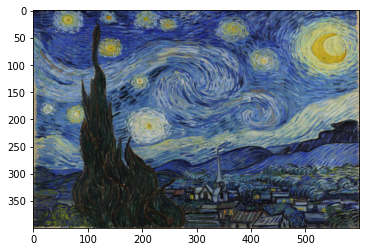

In [ ]:
plt.imshow(convert(style1))

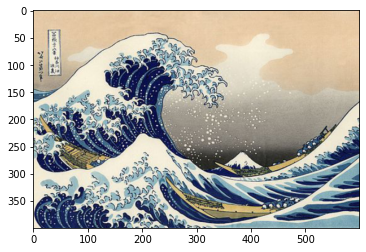

In [ ]:
plt.imshow(convert(style2))

Рассмотрим стили:

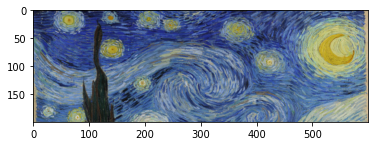

In [ ]:
plt.imshow(convert(style1[:,:,:200,:]))

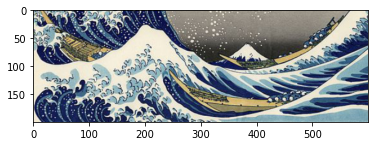

In [ ]:
plt.imshow(convert(style2[:,:,200:,:]))

Получаем фичи:

In [ ]:
def get_features(image, model, layers=None):
  if layers is None:
    layers = {'0': 'conv1_1',
              '5': 'conv2_1',
              '10': 'conv3_1',
              '19': 'conv4_1',
              '21': 'conv4_2',  ## content layer
              '28': 'conv5_1'}
  features = {}
  x = image
  for name, layer in enumerate(model.features):
    x = layer(x)
    if str(name) in layers:
      features[layers[str(name)]] = x
  
  return features

матрица грамма:

In [ ]:
def gram_matrix(tensor):
  _, n_filters, h, w = tensor.size()
  tensor = tensor.view(n_filters, h * w)
  gram = torch.mm(tensor, tensor.t())
  
  return gram

Скачиваем веса: 

In [ ]:
a = torch.utils.model_zoo.load_url('https://download.pytorch.org/models/vgg19-dcbb9e9d.pth', model_dir='/results/')

Обнуляем градиенты:

In [ ]:
vgg = models.vgg19()
vgg.load_state_dict(a)

for param in vgg.parameters():
  param.requires_grad_(False)

Заменим макс. пулинг на средний пулинг, по мнению авторов это улучшит результат:

In [ ]:
for i, layer in enumerate(vgg.features):
  if isinstance(layer, torch.nn.MaxPool2d):
    vgg.features[i] = torch.nn.AvgPool2d(kernel_size=2, stride=2, padding=0)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg.to(device).eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (17): ReLU(inplace=True)
    (18): AvgPool

Загружаем контент:

In [ ]:
!wget = https://www.vsemirnyjbank.org/content/dam/photos/780x439/2017/jun-1/ru-city-780.jpg

--2020-06-15 14:16:23--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2020-06-15 14:16:23--  https://www.vsemirnyjbank.org/content/dam/photos/780x439/2017/jun-1/ru-city-780.jpg
Resolving www.vsemirnyjbank.org (www.vsemirnyjbank.org)... 13.224.13.111, 13.224.13.41, 13.224.13.105, ...
Connecting to www.vsemirnyjbank.org (www.vsemirnyjbank.org)|13.224.13.111|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 115467 (113K) [image/jpeg]
Saving to: ‘ru-city-780.jpg.2’

ru-city-780.jpg.2   100%[===================>] 112.76K   751KB/s    in 0.2s    

2020-06-15 14:16:23 (751 KB/s) - ‘ru-city-780.jpg.2’ saved [115467/115467]

FINISHED --2020-06-15 14:16:23--
Total wall clock time: 0.6s
Downloaded: 1 files, 113K in 0.2s (751 KB/s)


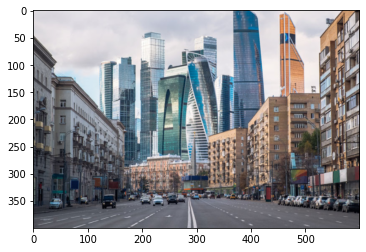

In [ ]:
content = load('ru-city-780.jpg').to(device)
plt.imshow(convert(content))

Получаем фичи от стилей и контента:

In [ ]:
style1 = style1.to(device)
style2 = style2.to(device)

content_features = get_features(content, vgg)
style_features1 = get_features(style1[:,:,:200,:], vgg)
style_features2 = get_features(style2[:,:,200:,:], vgg)

Считаем матрицы грамма:

In [ ]:
style_grams1 = {
  layer: gram_matrix(style_features1[layer]) for layer in style_features1}

In [ ]:
style_grams2 = {
  layer: gram_matrix(style_features2[layer]) for layer in style_features2}

Сгенерируем шум:

In [ ]:
target = torch.randn_like(content).requires_grad_(True).to(device)

веса для слоев:

In [ ]:
style_weights = {'conv1_1': 0.75,
                 'conv2_1': 0.5,
                 'conv3_1': 0.2,
                 'conv4_1': 0.2,
                 'conv5_1': 0.2}

In [ ]:
content_weight = 1e4
style_weight = 1e2


In [ ]:
optimizer = optim.Adam([target], lr=0.01)

In [ ]:
torch.autograd.set_detect_anomaly(True)

Обучаем:

In [ ]:
for i in range(1, 400):
  optimizer.zero_grad()
  
  target_features = get_features(target.clone(), vgg)
  target_features1 = get_features(target[:,:,:200,:].clone(), vgg)
  target_features2 = get_features(target[:,:,200:,:].clone(), vgg)


  content_loss = torch.mean((target_features['conv4_2'] -
                             content_features['conv4_2']) ** 2)
  
  style_loss = 0
  for layer in style_weights:
    target_feature1 = target_features1[layer]
    target_feature2 = target_features2[layer]
    target_gram1 = gram_matrix(target_feature1)
    target_gram2 = gram_matrix(target_feature2)

    _, d1, h1, w1 = target_feature1.shape
    _, d2, h2, w2 = target_feature2.shape
    

    style_gram1 = style_grams1[layer]
    style_gram2 = style_grams2[layer]
    
    layer_style_loss1 = style_weights[layer] * torch.mean(
      (target_gram1 - style_gram1) ** 2)
    
    layer_style_loss2 = style_weights[layer] * torch.mean(
      (target_gram2 - style_gram2) ** 2)
    

    style_loss += layer_style_loss1 / (d1 * h1 * w1)
    style_loss += layer_style_loss2 / (d2 * h2 * w2)
    
    
    total_loss = content_weight * content_loss + style_weight * style_loss 
    total_loss.backward(retain_graph=True)
    optimizer.step()
    
  
  total_loss_rounded = round(total_loss.item(), 2)
  content_fraction = round(
      content_weight*content_loss.item()/total_loss.item(), 2)
  style_fraction = round(
      style_weight*style_loss.item()/total_loss.item(), 2)
  print('Iteration {}, Total loss: {} - (content: {}, style {})'.format(
      i,total_loss_rounded, content_fraction, style_fraction))
      
final_img = convert(target)

Iteration 1, Total loss: 70561.81 - (content: 0.1, style 0.9)
Iteration 2, Total loss: 60540.57 - (content: 0.12, style 0.88)
Iteration 3, Total loss: 52506.44 - (content: 0.13, style 0.87)
Iteration 4, Total loss: 46076.54 - (content: 0.15, style 0.85)
Iteration 5, Total loss: 40991.64 - (content: 0.17, style 0.83)
Iteration 6, Total loss: 36938.77 - (content: 0.18, style 0.82)
Iteration 7, Total loss: 33656.05 - (content: 0.2, style 0.8)
Iteration 8, Total loss: 30953.92 - (content: 0.21, style 0.79)
Iteration 9, Total loss: 28693.41 - (content: 0.23, style 0.77)
Iteration 10, Total loss: 26767.84 - (content: 0.24, style 0.76)
Iteration 11, Total loss: 25091.67 - (content: 0.25, style 0.75)
Iteration 12, Total loss: 23595.25 - (content: 0.26, style 0.74)
Iteration 13, Total loss: 22232.21 - (content: 0.27, style 0.73)
Iteration 14, Total loss: 20972.7 - (content: 0.28, style 0.72)
Iteration 15, Total loss: 19799.71 - (content: 0.29, style 0.71)
Iteration 16, Total loss: 18705.95 - (c

In [ ]:
final_img = convert(target)

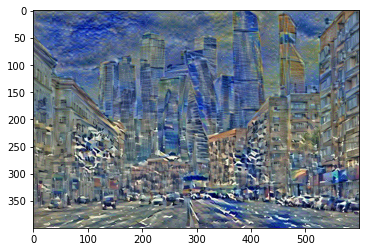

In [ ]:
plt.imshow(final_img)

Видно, что стили перенеслись ровно пополам катринки.

Попробуем перенесити одновременно два стиля на одну картинку контента:

In [ ]:
content_features = get_features(content, vgg)
style_features1 = get_features(style1, vgg)
style_features2 = get_features(style2, vgg)

In [ ]:
style_grams1 = {
  layer: gram_matrix(style_features1[layer]) for layer in style_features1}
style_grams2 = {
  layer: gram_matrix(style_features2[layer]) for layer in style_features2}

In [ ]:
target = torch.randn_like(content).requires_grad_(True).to(device)

In [ ]:
optimizer = optim.Adam([target], lr=0.01)

Возьмем соотношение стилей 70 на 30:

Обучим:

In [ ]:
for i in range(1, 400):
  optimizer.zero_grad()
  
  target_features = get_features(target.clone(), vgg)


  content_loss = torch.mean((target_features['conv4_2'] -
                             content_features['conv4_2']) ** 2)
  
  style_loss = 0
  for layer in style_weights:
    target_feature = target_features[layer]
    target_gram = gram_matrix(target_feature)

    _, d, h, w = target_feature.shape
    

    style_gram1 = style_grams1[layer]
    style_gram2 = style_grams2[layer]
    
    layer_style_loss1 = style_weights[layer] * torch.mean(
      (target_gram - style_gram1) ** 2)
    
    layer_style_loss2 = style_weights[layer] * torch.mean(
      (target_gram - style_gram2) ** 2)
    

    style_loss += (layer_style_loss1 / (d * h * w))*0.7
    style_loss += (layer_style_loss2 / (d2 * h * w))*0.3
    
    
    total_loss = content_weight * content_loss + style_weight * style_loss 
    total_loss.backward(retain_graph=True)
    optimizer.step()
    
  
  total_loss_rounded = round(total_loss.item(), 2)
  content_fraction = round(
      content_weight*content_loss.item()/total_loss.item(), 2)
  style_fraction = round(
      style_weight*style_loss.item()/total_loss.item(), 2)
  print('Iteration {}, Total loss: {} - (content: {}, style {})'.format(
      i,total_loss_rounded, content_fraction, style_fraction))
      
final_img1 = convert(target)

Iteration 1, Total loss: 54798.79 - (content: 0.13, style 0.87)
Iteration 2, Total loss: 46058.78 - (content: 0.15, style 0.85)
Iteration 3, Total loss: 39030.68 - (content: 0.17, style 0.83)
Iteration 4, Total loss: 33427.71 - (content: 0.2, style 0.8)
Iteration 5, Total loss: 29075.35 - (content: 0.23, style 0.77)
Iteration 6, Total loss: 25722.02 - (content: 0.26, style 0.74)
Iteration 7, Total loss: 23132.44 - (content: 0.28, style 0.72)
Iteration 8, Total loss: 21109.71 - (content: 0.3, style 0.7)
Iteration 9, Total loss: 19503.64 - (content: 0.32, style 0.68)
Iteration 10, Total loss: 18192.33 - (content: 0.33, style 0.67)
Iteration 11, Total loss: 17087.7 - (content: 0.35, style 0.65)
Iteration 12, Total loss: 16134.32 - (content: 0.36, style 0.64)
Iteration 13, Total loss: 15290.68 - (content: 0.36, style 0.64)
Iteration 14, Total loss: 14527.1 - (content: 0.37, style 0.63)
Iteration 15, Total loss: 13826.47 - (content: 0.37, style 0.63)
Iteration 16, Total loss: 13172.09 - (co

KeyboardInterrupt: ignored

In [ ]:
final_img1 = convert(target)

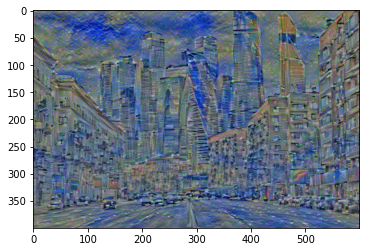

In [ ]:
plt.imshow(final_img1)

Итог:

Было:


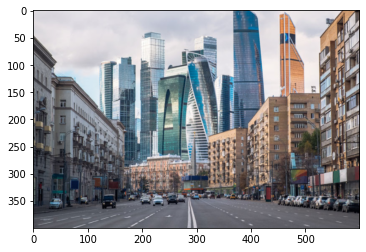

In [ ]:
plt.imshow(convert(content))

1)Разные стили на 2-ух разных частях: 

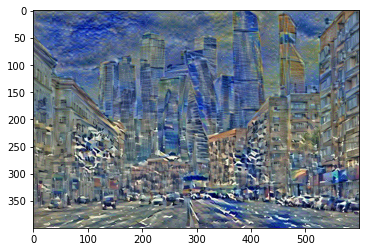

In [ ]:
plt.imshow(final_img)

2) Обьединение стилей 70% - 1-го, 30% - 2-го:




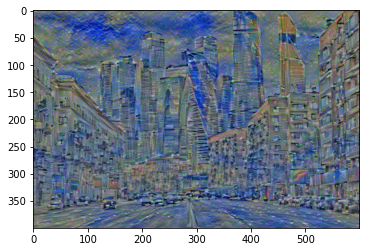

In [ ]:
plt.imshow(final_img1)

Москва сильно преобразилась...